Canny Edge Detection from scratch completed! Output saved as canny_custom.jpg
Neon glow effect applied! Saved as neon_output.jpg
/content/neon_output.jpg


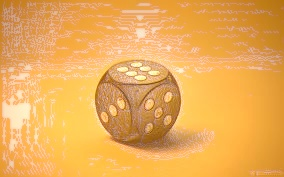

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def canny(image,h,l):



    kernel_size = 5
    image_blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 1.4)


    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


    gradient_x = cv2.filter2D(image_blurred, -1, Gx)
    gradient_y = cv2.filter2D(image_blurred, -1, Gy)


    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255

    gradient_direction = np.arctan2(gradient_y, gradient_x)


    height, width = gradient_magnitude.shape
    nms_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            angle = gradient_direction[i, j] * (180.0 / np.pi)
            angle = angle % 180


            q = 255
            r = 255

            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q = gradient_magnitude[i, j + 1]
                r = gradient_magnitude[i, j - 1]
            elif (22.5 <= angle < 67.5):
                q = gradient_magnitude[i + 1, j - 1]
                r = gradient_magnitude[i - 1, j + 1]
            elif (67.5 <= angle < 112.5):
                q = gradient_magnitude[i + 1, j]
                r = gradient_magnitude[i - 1, j]
            elif (112.5 <= angle < 157.5):
                q = gradient_magnitude[i - 1, j - 1]
                r = gradient_magnitude[i + 1, j + 1]


            if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
                nms_image[i, j] = gradient_magnitude[i, j]
            else:
                nms_image[i, j] = 0


    high_threshold = h
    low_threshold = l

    strong_edges = (nms_image >= high_threshold).astype(np.uint8) * 255
    weak_edges = ((nms_image >= low_threshold) & (nms_image < high_threshold)).astype(np.uint8) * 50


    final_edges = np.copy(strong_edges)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if weak_edges[i, j] == 50:
                if (
                    strong_edges[i+1, j-1] == 255 or strong_edges[i+1, j] == 255 or strong_edges[i+1, j+1] == 255 or
                    strong_edges[i, j-1] == 255 or strong_edges[i, j+1] == 255 or
                    strong_edges[i-1, j-1] == 255 or strong_edges[i-1, j] == 255 or strong_edges[i-1, j+1] == 255
                ):
                    final_edges[i, j] = 255


    cv2.imwrite("canny_custom.jpg", final_edges)
    print("Canny Edge Detection from scratch completed! Output saved as canny_custom.jpg")


    return final_edges
    cv2.imshow("Canny Edge Detection", final_edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def apply_neon_glow(image_path, output_path):

    image = cv2.imread(image_path)


    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = canny(gray, 100, 200)


    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)


    glow = cv2.GaussianBlur(edges_colored, (7, 7), 0)
    glow = cv2.addWeighted(edges_colored, 0.5, glow, 0.5, 0)


    glow[:, :, 1] = np.maximum(glow[:, :, 1], 150)
    glow[:, :, 2] = np.maximum(glow[:, :, 2], 255) \


    final = cv2.addWeighted(image, 0.8, glow, 0.5, 0)


    cv2.imwrite(output_path, final)
    print(f"Neon glow effect applied! Saved as {output_path}")


apply_neon_glow("/content/drive/MyDrive/Colab Notebooks/Datasets/cube.jpeg", "neon_output.jpg")
print("/content/neon_output.jpg")


output_img=cv2.imread("/content/neon_output.jpg")
input_img=cv2.imread("/content/cube.jpg")

# cv2_imshow(input_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

cv2_imshow(output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# /content/drive/MyDrive/Colab Notebooks/Datasets/cube.jpeg
# /content/drive/MyDrive/Colab Notebooks/Datasets/pot.jpeg

